## GRADUATE ROTATIONAL INTERNSHIP PROGRAM(GRIP) - THE SPARK FOUNDATION 
## COMPUTER VISION  AND IOT                                        [#GRIPJULY21]
## TASK 2: COLOR IDENTIFICATION IN IMAGE
## NAME: Kshitij Palikundwar


### Importing Required Libraries used for Color Identification 

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
img1_path = 'colorpic.jpg' 
csv_path = 'colors.csv'

In [3]:
img1 = cv2.imread(img1_path)

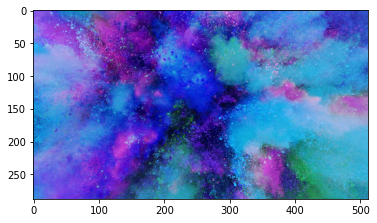

In [4]:
plt.imshow(img1)

### BGR to RGB conversion to give original image

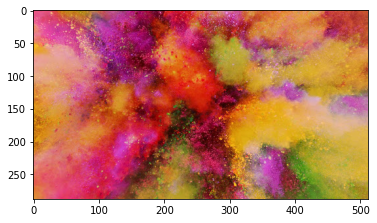

In [5]:
img2 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)    
plt.imshow(img2)

### RGB to Hex Conversion

In [6]:
index = ['colour', 'colour_name', 'hex', 'R', 'G', 'B']   
df = pd.read_csv(csv_path, names=index, header=None)

In [7]:
clicked = False
r = g = b = xpos = ypos = 0

In [8]:
def get_color_name(R,G,B):
    minimum = 1000
    for i in range (len(df)):
        d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B - int(df.loc[i,'B'])) 
        if d <= minimum:
            minimum = d
            cname = df.loc[i,'colour_name']   
    return cname        

In [9]:
def draw_function(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r, xpos, ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img1[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [10]:
cv2.namedWindow('Task')
cv2.setMouseCallback('Task', draw_function)

In [ ]:
while True:
    cv2.imshow('Task',img1)
    if clicked:
        cv2.rectangle(img1, (20,20), (600,60), (b,g,r), -1)
        text = get_color_name(r,g,b) + 'R=' + str(r) + 'G=' + str(g) + 'B=' + str(b)
        cv2.putText(img1, text, (50,50), 2, 0.8, (255,255,255), 2, cv2.LINE_AA)
        
    if cv2.waitKey(20) & 0xFF == 27:
             break
            
cv2.destroyAllWindows()        